In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from sklearn.linear_model import LinearRegression

# Regresión Lineal

In [30]:
# Creamos unos datos aleatorios para representar el error de una regresion lineal
x = np.linspace(0, 10, 100)
y = 3 * x + np.random.normal(0, 1, 100)

In [31]:
# Creamos el modelo de regresion lineal
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [32]:
# Lo entrenamos
y_pred = model.predict(x.reshape(-1, 1))
# Vemos los parametros de la regresion
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)

Coeficiente: [3.02334683]
Intercepto: 0.1405775053651066


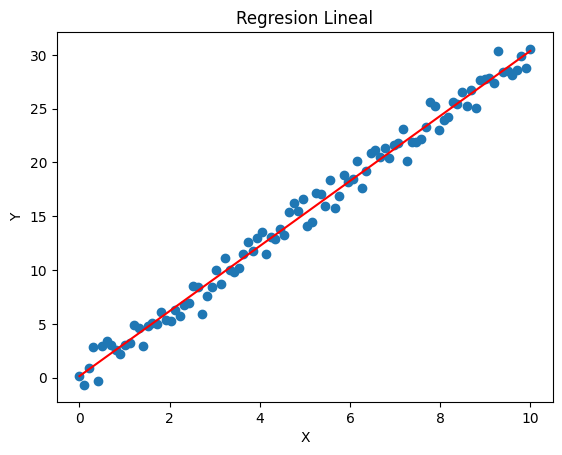

In [33]:
# graficamos los datos y el modelo de regresion
fig, ax = plt.subplots()
ax.scatter(x, y)
line, = ax.plot(x, y_pred, color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresion Lineal')
plt.show()

# Guardamos la imagen en un archivo
fig.savefig('E:/Data Science/Conceptos ML/img/regresion_lineal.png')


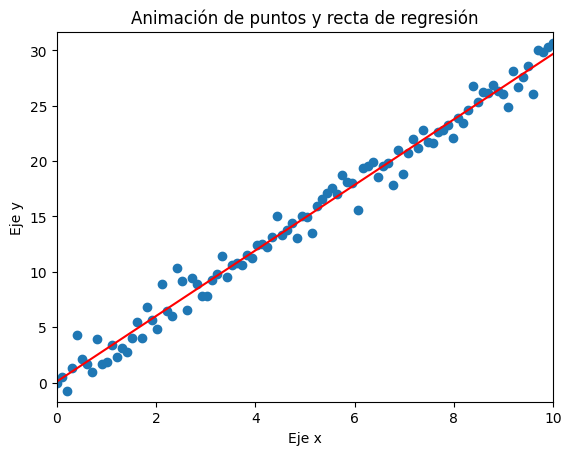

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from sklearn.linear_model import LinearRegression

# Generar datos de ejemplo
x = np.linspace(0, 10, 100)
y = 3 * x + np.random.normal(0, 1, 100)

# Configurar la figura y el eje
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(min(y) - 1, max(y) + 1)
scatter = ax.scatter([], [])
line, = ax.plot([], [], 'r')

# Añadir titulo y etiquetas de los ejes
ax.set_xlabel('Eje x')
ax.set_ylabel('Eje y')
ax.set_title('Animación de puntos y recta de regresión')

# Función de inicialización
def init():
    scatter.set_offsets(np.empty((0, 2)))
    line.set_data([], [])
    return scatter, line

# Función de actualización
def update(frame):
    data = np.column_stack((x[:frame], y[:frame]))
    scatter.set_offsets(data)
    
    if frame > 1:
        model = LinearRegression()
        model.fit(x[:frame].reshape(-1, 1), y[:frame])
        y_pred = model.predict(x[:frame].reshape(-1, 1))
        line.set_data(x[:frame], y_pred)
    
    return scatter, line

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(x)+1, init_func=init, blit=True, interval=100)

# Guardar la animación en un archivo
ani.save('E:/Data Science/Conceptos ML/gif/ani_regresion_lineal.gif', writer='pillow', fps=10)

# Mostrar la animación en el notebook
HTML(ani.to_jshtml())